## Exercício número 1
A indústria farmacêutica Farmex vende um remédio para combater resfriado. Após 20 meses de operação ela coletou as seguintes informações:

======================#######=========================
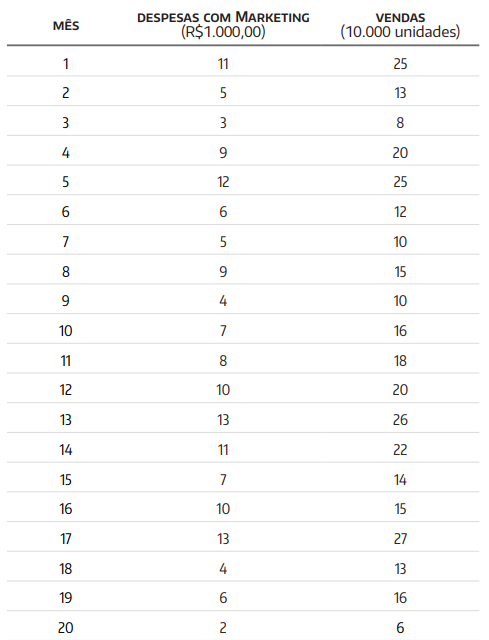
=========================



1. Ajuste o modelo de regressão linear simples usando o método de mínimos quadrados e `determine a equação da reta`.


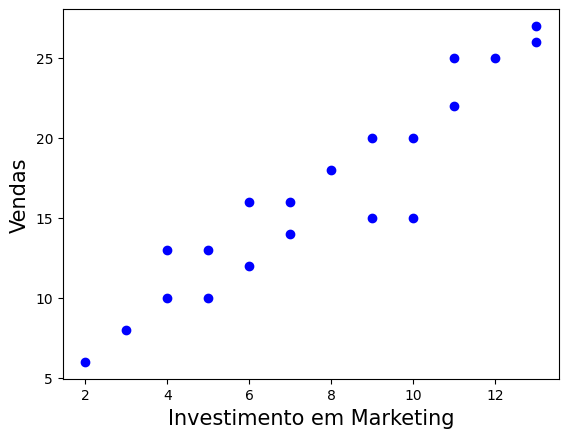

In [1]:
# Pela tabela observada anteriormente, dispomos de dados referente a um período de operações de 20 meses.
# Os dados disponíveis são:
#   X: "Despesas com marketing (R$ 1.000,00). Esta é a variável preditora ou independente (variável sob a qual temos o controle direto);
#   Y: "Vendas (10.000 unidades)". Esta é a variável dependente/resposta (variável sob a qual não temos influencia direta)

# criando os vetores das respectivas v.a.  (x,y)

# importando as bibliotecas necessárias
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline



x = np.array([11,5,3,9,12,6,5,9,4,7,8,10,13,11,7,10,13,4,6,2]) # Despesas com marketing (* R$ 1.000,00)
mean_x = np.mean(x)


y = np.array([25,13,8,20,25,12,10,15,10,16,18,20,26,22,14,15,27,13,16,6]) # Vendas (* 1.000)
mean_y = np.mean(y)


plt.plot(x,y,'bo')
plt.ylabel("Vendas", fontsize = 15)
plt.xlabel("Investimento em Marketing", fontsize = 15)
plt.show(True)


A observação dos dados plotados (Investimento em Marketing x Vendas) demonstra que parace haver uma associação/correlação entre as variáveis aleatórias em questão. A associação é positiva, visto que o aumento do investimento em marketing ocasiona aumento das vendas. Lembrando sempre como ocorre o design do negócio para não incorrer apenas e fazer inferência a respeito do fato de haver associação indicar causa.


In [7]:
# fazendo o reuso do código utilizado em outro exercício:

from statistics import variance
import math

def estimated_coef(X,Y):
    # número de observações/pontos
    n = np.size(x) # n é o tamanho do vetor x

    S_xy = 0 # contador
    S_xx = 0 # tb contador

    for i in range(0, len(x)):
        S_xy = S_xy + (x[i] - mean_x)*(y[i] - mean_y)
        S_xx = S_xx + (x[i] - mean_x)**2

    # calculando os coeficientes de regressão:
    b_1 = S_xy/S_xx
    b_0 = mean_y - (b_1*mean_x)
    return(b_0, b_1)

# função para mostrar os dados e o ajuste linear do modelo:

def plot_regression_line(x,y,b):
    # mostrar os dados
    plt.scatter(x,y, color = "b", marker = "o", s = 50)

    # prediz os valores
    y_pred = b[0] + b[1] * x

    # mostra a reta de regressão
    plt.plot(x,y_pred, color = "r")

    plt.xlabel("Investimento em marketing", fontsize = 12)
    plt.ylabel("Vendas", fontsize = 12)
    plt.show(True)

Coeficientes estimados: 
b_0 = 3.1076023391812875 
b_1 = 1.734502923976608


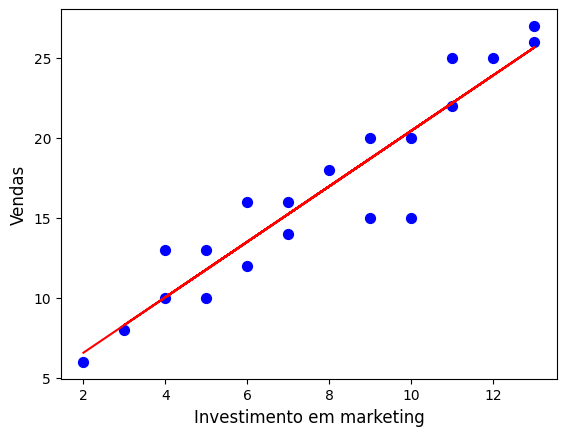

In [8]:
# aplicando as fçs no conjunto de dados:

# estimando os coeficientes:
b = estimated_coef(x,y)
print("Coeficientes estimados: \nb_0 = {} \nb_1 = {}". format(b[0], b[1]))

# mostrar o ajuste linear
plot_regression_line(x,y,b)

In [10]:
# Resposta item a (equação da reta):

# Reta de regressão para os valores ou dados do problema:
# y_equacao_reta = 3.11 + 1.73 * x_observado

2. Encontre a venda esperada, associada com um investimento em da ordem de R$12.000,00 em Marketing.


In [14]:
x_observado = eval(input("digite o valor investido em reais, sem ponto e sem as 2 ultimas casas decimais"))

y_equacao_reta = 3.11 + 1.73 * x_observado

print("Para um investimento de R$ 12.000,00, é estimado um volume de vendas da ordem de ", y_equacao_reta * 10000)

digite o valor investido em reais, sem ponto e sem as 2 ultimas casas decimais12
Para um investimento de R$ 12.000,00, é estimado um volume de vendas da ordem de  238699.99999999997


Os valores máximos dos pares ($x_i$,$y_i$) demonstram que para um investimento de R$ 13.000,00 em marketing, há um valor de vendas de 270.000 unidades do produto.

Pela reta de regressão encontrada, um investimento de R$ 12.000,00 reais resultaria em aproximadamente 238.700 unidades do produto vendidas.

3. Determine o coeficiente de correlação de Pearson

In [16]:
# função para determinar R2

def R2(x,y):
    n = len(x)

    # médias de x e y:
    mean_x, mean_y = np.mean(x), np.mean(y)

    S_xy = 0
    S_xx = 0
    S_yy = 0

    for i in range(0, len(x)):
        S_xy = S_xy + (x[i] - mean_x)*(y[i] - mean_y)
        S_xx = S_xx + (x[i] - mean_x)**2
        S_yy = S_yy + (y[i] - mean_y)**2

    R2 = (S_xy**2)/(S_xx*S_yy)

    return R2

print('R2:', R2(x,y))

R2: 0.8870500849221706


O coeficiente de determinação da reta é igual a 0.88, indicando haver uma forte associação das variáveis pelo modelo de regressão linear simples.


In [18]:
# o coeficiente de correlação de pearson é a raiz quadrade de R2
coef_pearson = math.sqrt(R2(x,y))
print('O coeficiente de correlação de Pearson vale ', coef_pearson)

O coeficiente de correlação de Pearson vale  0.941833363670119


In [28]:
!pip install statsmodels
import statsmodels.api as sm
est = sm.OLS(y,x)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              1042.
Date:                Tue, 15 Aug 2023   Prob (F-statistic):                    4.61e-18
Time:                        19:55:08   Log-Likelihood:                         -45.522
No. Observations:                  20   AIC:                                      93.04
Df Residuals:                      19   BIC:                                      94.04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

No summary anterior, o valor de p>|t| = 0, o que isto significa?

No contexto de um modelo de regressão linear, a expressão "P>|t|" refere-se ao valor p associado a um teste t realizado para avaliar a significância estatística dos coeficientes de regressão.

Especificamente, "P>|t|" é o valor p associado ao teste t para testar a hipótese nula de que o coeficiente de regressão correspondente é igual a zero (nenhum efeito).

Quando o valor p associado ao teste t é próximo de zero (geralmente considerado menor que 0,05), isso sugere que há evidências estatísticas suficientes para rejeitar a hipótese nula.

Isso significa que o coeficiente de regressão em questão é provavelmente diferente de zero e tem um efeito significativo na variável de resposta. Em outras palavras, o valor p baixo indica que é `IMPROVAVEL` que o resultado observado tenha ocorrido apenas por acaso.

Por outro lado, quando o valor p associado ao teste t é maior que 0,05 (ou qualquer nível de significância escolhido), isso sugere que não há evidências estatísticas suficientes para rejeitar a hipótese nula. Nesse caso, o coeficiente de regressão não é considerado estatisticamente significativo e pode ser interpretado como não tendo um efeito importante na variável de resposta.

Portanto, em resumo:

`P>|t| próximo de zero: O coeficiente de regressão é estatisticamente significativo e tem um efeito importante.`

P>|t| maior que um nível de significância (por exemplo, 0,05): O coeficiente de regressão não é estatisticamente significativo e não tem um efeito importante.

Lembrando que a interpretação dos resultados de um modelo de regressão deve ser feita com cuidado, considerando o contexto do problema, a teoria subjacente e outras análises estatísticas relevantes.